In [1]:
import pandas as pd
from nixtla import NixtlaClient

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


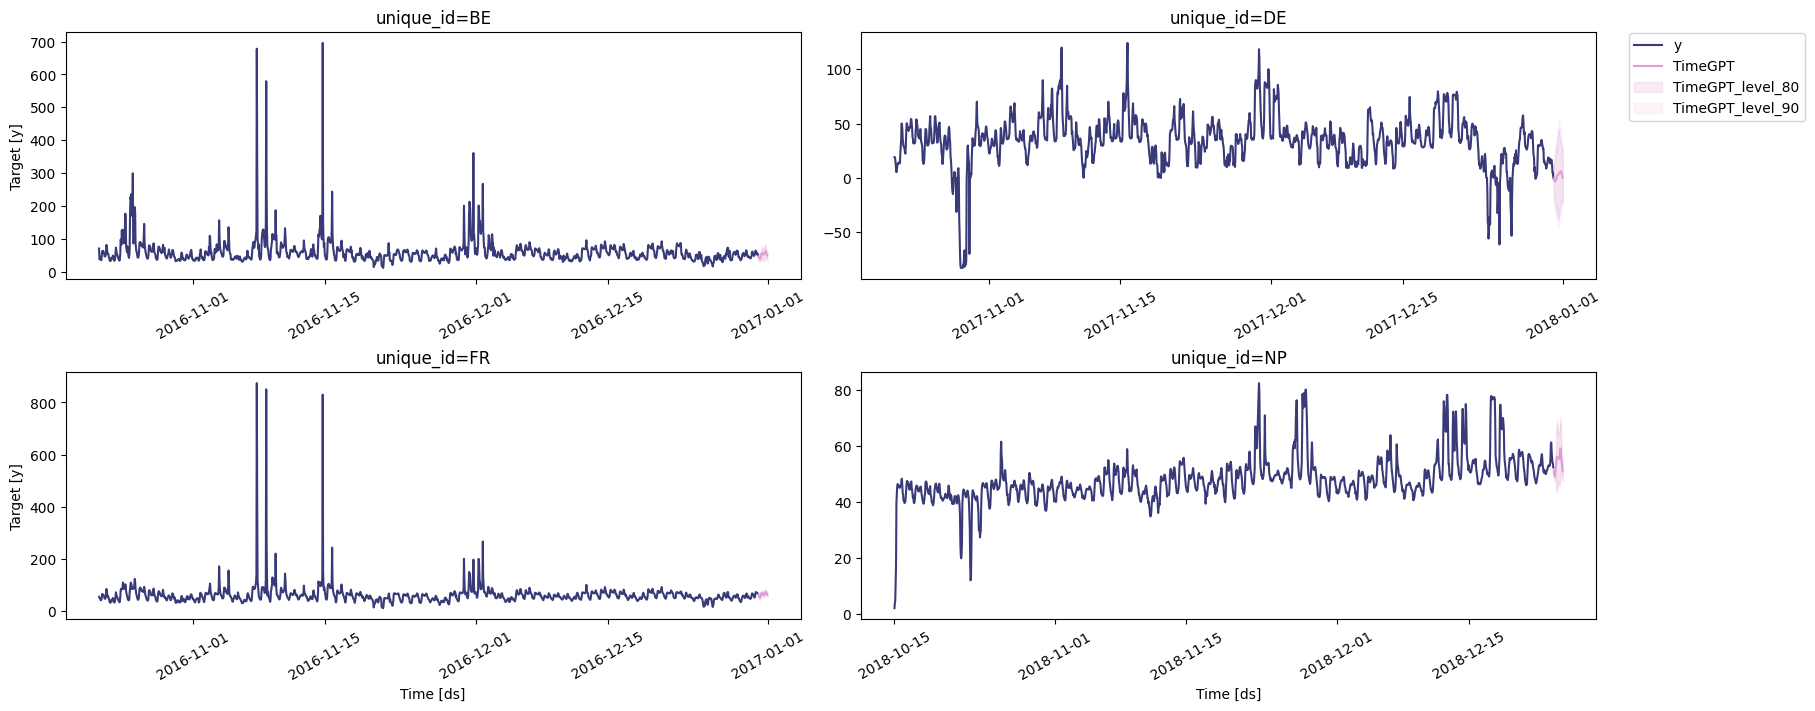

In [2]:
# Get your API Key at dashboard.nixtla.io

# 1. Instantiate the NixtlaClient
nixtla_client = NixtlaClient(api_key = 'nixak-DsxZOMbxsay3MdWN2xjuccy93YzTjcrsDRb28kr7iz51IkXTpDfle7PJvU62tkjMeWLD6Xrmd5tV2Qjc')

# 2. Read historic electricity demand data
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short.csv')

# 3. Forecast the next 24 hours
fcst_df = nixtla_client.forecast(df, h=24, level=[80, 90])

# 4. Plot your results (optional)
nixtla_client.plot(df, fcst_df, level=[80, 90])


In [4]:
df

,unique_id,ds,y
0,0,2007-12-10,9.590761
1,0,2007-12-11,8.519590
2,0,2007-12-12,8.183677
3,0,2007-12-13,8.072467
4,0,2007-12-14,7.893572
...,...,...,...
2959,0,2016-01-16,7.817223
2960,0,2016-01-17,9.273878
2961,0,2016-01-18,10.333775
2962,0,2016-01-19,9.125871


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...


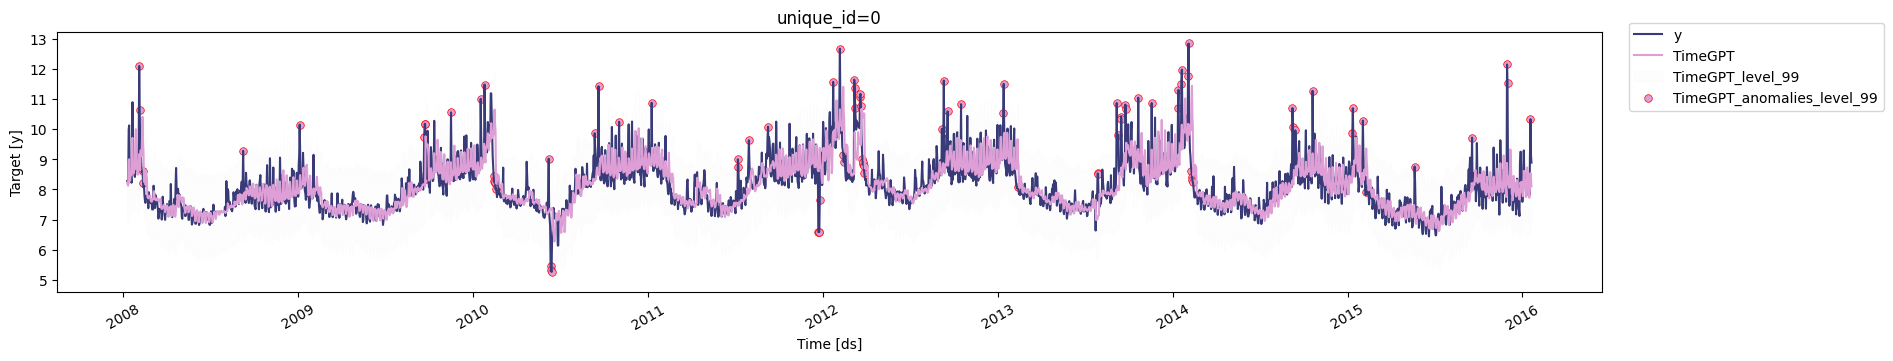

In [7]:
# Get your API Key at dashboard.nixtla.io


# 2. Read Data # Wikipedia visits of NFL Star (
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/peyton-manning.csv')


# 3. Detect Anomalies
anomalies_df = nixtla_client.detect_anomalies(df, time_col='ds', target_col='y', freq='D')

# 4. Plot your results (optional)
nixtla_client.plot(df, anomalies_df,time_col='ds', target_col='y')

In [8]:
anomalies_df

,unique_id,ds,y,TimeGPT,TimeGPT-hi-99,TimeGPT-lo-99,anomaly
0,0,2008-01-10,8.281724,8.224189,9.503589,6.944789,False
1,0,2008-01-11,8.292799,8.151555,9.430955,6.872155,False
2,0,2008-01-12,8.199189,8.127275,9.406675,6.847876,False
3,0,2008-01-13,9.996522,8.917264,10.196664,7.637864,False
4,0,2008-01-14,10.127071,9.002327,10.281727,7.722927,False
...,...,...,...,...,...,...,...
2928,0,2016-01-16,7.817223,7.728484,9.007884,6.449084,False
2929,0,2016-01-17,9.273878,8.267567,9.546967,6.988167,False
2930,0,2016-01-18,10.333775,8.543177,9.822577,7.263777,True
2931,0,2016-01-19,9.125871,8.298725,9.578125,7.019325,False


In [16]:
df = pd.read_csv("../../data/processed/lynch_cgm_resampled.csv")


In [24]:
df

,ID,time,glc
0,lynch_1001,2020-07-06 00:00:00,189.50
1,lynch_1001,2020-07-06 00:15:00,182.00
2,lynch_1001,2020-07-06 00:30:00,173.00
3,lynch_1001,2020-07-06 00:45:00,164.67
4,lynch_1001,2020-07-06 01:00:00,146.67
...,...,...,...
4795821,lynch_1440,2020-09-24 14:30:00,231.33
4795822,lynch_1440,2020-09-24 14:45:00,243.00
4795823,lynch_1440,2020-09-24 15:00:00,241.67
4795824,lynch_1440,2020-09-24 15:15:00,223.00


In [17]:
df.dropna(inplace=True)

In [22]:
df.drop_duplicates(['ID', 'time'], inplace=True)

In [33]:
import pandas as pd

# Ensure time is in datetime format
df["time"] = pd.to_datetime(df["time"])

# Function to reindex each participant's data to a perfect 15m grid
def reindex_time_series(group):
    full_time_index = pd.date_range(start=group["time"].min(), end=group["time"].max(), freq="15min")
    group = group.set_index("time").reindex(full_time_index).reset_index()
    group = group.rename(columns={"index": "time"})  # Restore time column name
    group["ID"] = group["ID"].iloc[0]  # Restore ID column
    return group

# Apply to each participant
df_fixed = df.groupby("ID", group_keys=False).apply(reindex_time_series)

# Fill missing glucose values with interpolation
df_fixed["glc"] = df_fixed["glc"].interpolate(method="linear")

# Ensure order
df_fixed = df_fixed.sort_values(["ID", "time"])


/tmp/ipykernel_286465/2750206583.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_fixed = df.groupby("ID", group_keys=False).apply(reindex_time_series)


In [44]:
df_subset = df_fixed[df_fixed["ID"] == 'lynch_1001'][:1000]

<Axes: xlabel='time'>

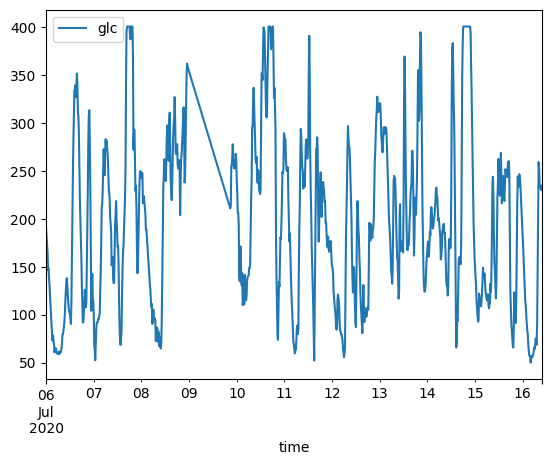

In [46]:
df_subset.plot(x='time', y='glc')

In [51]:
# Define forecast horizon (e.g., next 6 hours = 24 steps)
forecast_horizon = 24  

# Run TimeGPT predictions
forecasts_df = nixtla_client.forecast(
    df=df_subset,
    h= 500,
    time_col="time",
    target_col="glc",
    #id_col="ID",  # Enables multi-participant forecasting
    freq="15min",
)


INFO:nixtla.nixtla_client:Validating inputs...
/home/cat/Desktop/projects/glymo/venv/lib/python3.9/site-packages/nixtla/nixtla_client.py:383: UserWarning: `df` contains the following exogenous features: ['ID'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.
  warnings.warn(
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


KeyError: 'TimeGPT-lo-80'

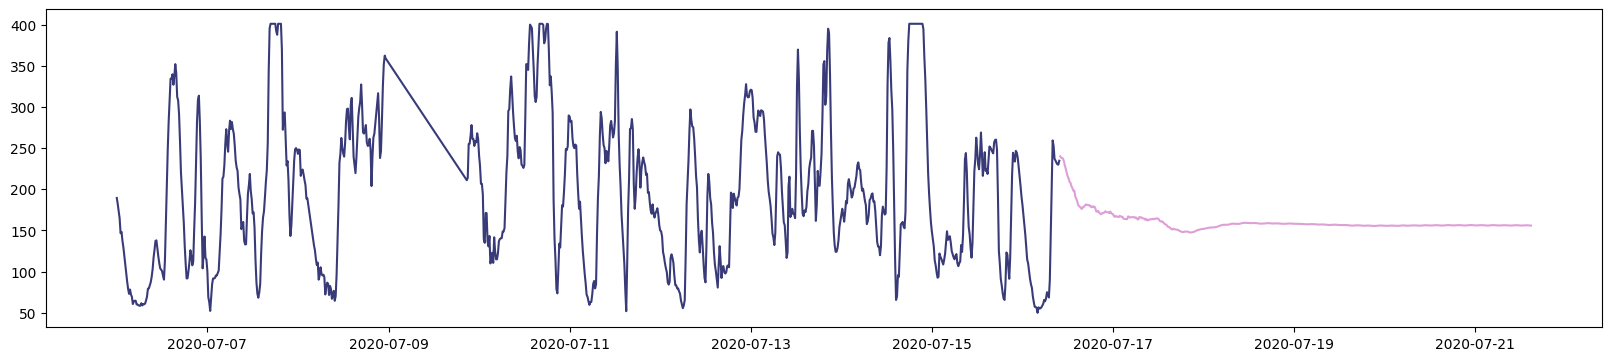

In [52]:
# 4. Plot your results (optional)
nixtla_client.plot(
    df_subset, 
    forecasts_df,      
    time_col="time",
    target_col="glc",
    level=[80, 90])

In [26]:
import numpy as np

# Define input sequence length (24h of data)
window_size = 96  

# Function to create prediction windows
def create_prediction_windows(group):
    group = group.sort_values("time")

    if len(group) < window_size:
        return None  # Skip if not enough history
    
    X = group.iloc[-window_size:][["glc", "time_sin"]].values  # Last 24h as input
    return X.reshape(1, window_size, 2)  # Shape (1, 96, 2)

# Prepare input data for each Lynch ID
X_test = np.vstack([create_prediction_windows(df_lynch[df_lynch["ID"] == pid]) for pid in lynch_ids if create_prediction_windows(df_lynch[df_lynch["ID"] == pid]) is not None])


NameError: name 'lynch_ids' is not defined